# Number of births by months in USSR/Russia

https://www.kaggle.com/datasets/puff1n/number-of-births-by-months-in-ussrrussia

The file contains 3 columns: year (1970 - 2018, excluding 2003 and 2004), month and number of people born. There is seasonality in the dynamics of fertility, but why did the peaks in fertility move over the past decades and how can this be verified correctly?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('years-months-births.csv', sep='\t')

In [21]:
df.head(5)

,year,month,births_gks
0,1956,1,294461
1,1956,2,241272
2,1956,3,252344
3,1956,4,239466
4,1956,5,233260


In [15]:
df.describe()

,year,month,births_gks
count,732.000000,732.000000,732.000000
mean,1986.459016,6.500000,164416.024590
std,18.241043,3.454413,38142.438731
min,1956.000000,1.000000,87968.000000
25%,1971.000000,3.750000,137370.750000
50%,1986.000000,6.500000,163265.000000
75%,2001.000000,9.250000,189541.250000
max,2018.000000,12.000000,294554.000000


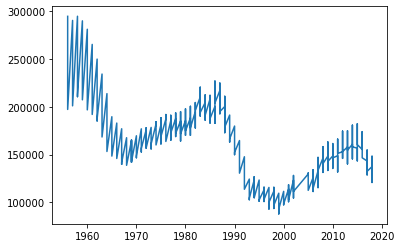

In [7]:
plt.plot(df.year, df.births_gks);

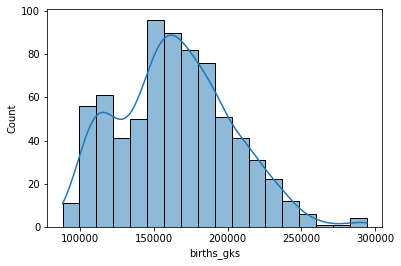

In [24]:
sns.histplot(df['births_gks'], kde = True);

In [35]:
df_by_year = df.groupby(by='year')['births_gks'].agg(['min', 'max', 'median', 'mean', 'sum'])
df_by_year

,min,max,median,mean,sum
year,,,,,
1956,197167,294461,224861.5,230776.666667,2769320
1957,200926,290178,232632.5,235966.500000,2831598
1958,210507,294554,233516.0,234934.000000,2819208
1959,207215,289736,231296.5,233019.000000,2796228
1960,196704,280955,228335.0,231862.750000,2782353
...,...,...,...,...,...
2014,145492,180725,160449.0,161890.250000,1942683
2015,143425,182130,159193.0,161714.833333,1940578
2016,146607,173955,156073.0,157394.000000,1888728


In [38]:
#plt.plot(df_by_year.index, df_by_year.sum);

In [25]:
birth_pivot_table = df.pivot_table(values='births_gks', index = 'month', columns = 'year')
birth_pivot_table

year,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,,,,,,,,,,,,,,
1,294461,290178,294554,289736,280955,265111,249768,234133,213661,189538,...,148418,148476,148754,152922,157954,160776,156619,155335,143259,137432
2,241272,229414,232751,230352,238607,217249,204527,194746,184027,163187,...,133409,135505,131841,147466,140198,145492,143425,147238,128776,120833
3,252344,258313,251086,252283,258328,242617,226143,215102,198818,183332,...,147660,149614,146653,156980,151585,158185,158032,156811,141491,133867
4,239466,241065,238452,239995,238177,228813,216624,203642,186166,173506,...,140690,144876,135260,146003,149343,156471,156080,151404,130711,128286
5,233260,236346,239615,234549,237652,229030,217543,202722,184834,173397,...,140669,147450,136971,152190,154049,160122,156009,157753,137911,130298
6,217554,213227,212919,219438,218852,211090,202436,190353,171076,162538,...,149976,154265,154168,161739,161292,165172,167701,166588,147743,137187
7,226033,230459,210507,232241,229043,218625,210143,195514,175174,164817,...,163160,161491,166152,172698,174839,180725,182130,173955,154715,146199
8,223690,234806,219301,234885,227627,220239,204272,191270,169877,164731,...,156065,155458,165339,174511,172218,173589,172263,172207,154455,148258
9,210348,227178,232002,222062,219014,211123,189379,178056,161958,156501,...,151574,151442,159134,163296,164633,168027,168217,161438,142417,136661


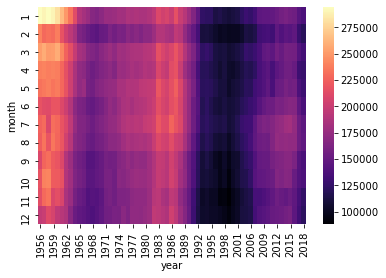

In [30]:
sns.heatmap(birth_pivot_table, linecolor='white', linewidths=0, cmap = 'magma');

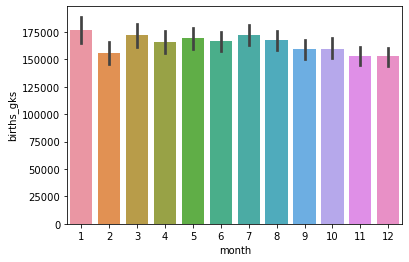

In [19]:
sns.barplot(x='month', y='births_gks', data = df);

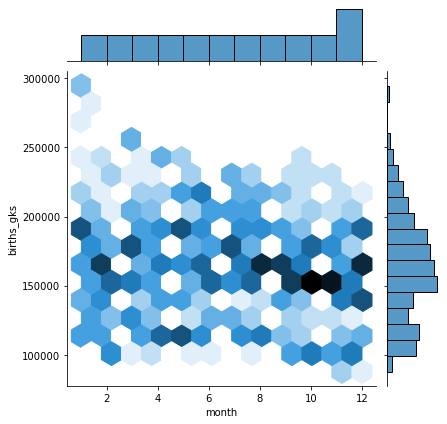

In [18]:
sns.jointplot(data = df, x='month', y='births_gks', kind='hex');